# Multi-objective Redundancy Allocation Integrating Interval Uncertainty and Hesitant Fuzzy Aggregation with a Non-Dominated Sorting Genetic Algorithm

In [76]:
# Objective function
c,b,r,x=var('c,b,r,x')
w,v,alpha=var('w,v,alpha')
costfn=c*x*exp(b/(1-r))
# weightfn=w*x*exp(x/4)
weightfn=w*x*exp(r/4)
#weightfn=w*r*exp(x/4)
relfn=1-(1-r)**x
# Constraint function
volumefn=v*x*(r**alpha)
costfn,weightfn,volumefn,relfn

(c*x*e^(-b/(r - 1)), w*x*e^(1/4*r), r^alpha*v*x, -(-r + 1)^x + 1)

### Reliability function 

In [77]:
## Reliability 
relfn(r=0.8,x=1),relfn(r=0.8,x=4),relfn(r=0.85,x=3),relfn(r=0.95,x=4)

(0.800000000000000, 0.998400000000000, 0.996625000000000, 0.999993750000000)

In [78]:
# Reliability plot
myplot=plot(relfn(r=0.7),(x,0,5),plot_points=10,marker='o',markersize=4,color='blue',legend_label=r'$R(x,r=0.7)$')
myplot+=plot(relfn(r=0.8),(x,0,5),plot_points=20,marker='*',markersize=8,color='green',legend_label=r'$R(x,r=0.8)$')
myplot+=plot(relfn(r=0.9),(x,0,5),plot_points=30,marker='x',markersize=4,color='red',legend_label=r'$R(x,r=0.9)$')
myplot.axes_labels(['$x$', '$R(x)$'])

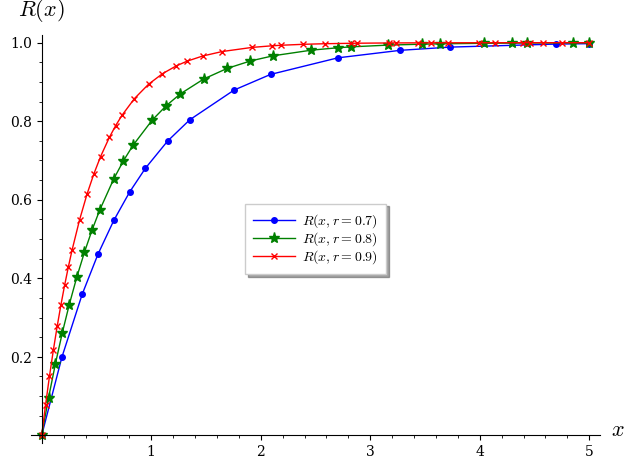

In [79]:
myplot.show(legend_handlelength=3,legend_numpoints=1,legend_loc=10,legend_markerscale=1)

In [80]:
# Reliability plot
myplot=plot(relfn(x=2),(r,0,1),plot_points=10,marker='o',markersize=4,color='blue',legend_label=r'$R(x=2,r)$')
myplot+=plot(relfn(x=5),(r,0,1),plot_points=20,marker='*',markersize=8,color='green',legend_label=r'$R(x=5,r)$')
myplot+=plot(relfn(x=10),(r,0,1),plot_points=30,marker='x',markersize=4,color='red',legend_label=r'$R(x=10,r)$')
myplot.axes_labels(['$r$', '$R(x)$'])

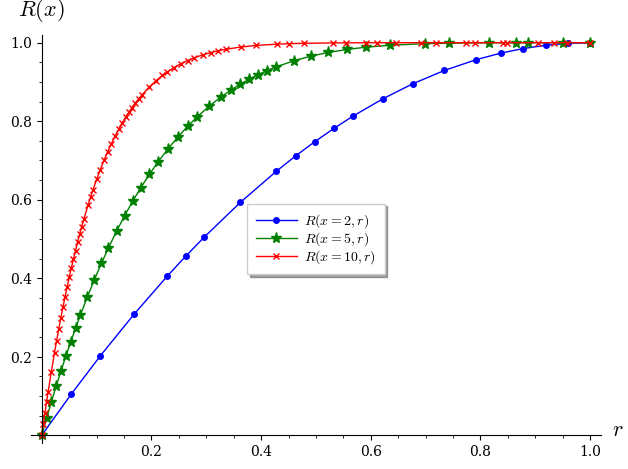

In [81]:
myplot.show(legend_handlelength=3,legend_numpoints=1,legend_loc=10,legend_markerscale=1)

In [82]:
Sys_Rel=relfn(r=0.8,x=4)*relfn(r=0.8,x=5)*relfn(r=0.85,x=3)*relfn(r=0.95,x=3)
Sys_Rel

0.994587651273216

### Cost function

In [83]:
## Cost
cf1=costfn(c=1,b=0.01,r=0)
cf1

1.01005016708417*x

In [84]:
# Cost function plot
myplot=plot(costfn(c=15,x=1,b=0.057),(r,0.7,0.95),plot_points=2,
            marker='o',markersize=6,color='red',legend_label=r'$C(r,c=15,x=1,b=0.057)$')
myplot+=plot(costfn(c=35,x=1,b=0.093),(r,0.7,0.95),plot_points=2,
            marker='d',markersize=6,color='blue',legend_label=r'$C(r,c=35,x=1,b=0.093)$')
myplot+=plot(costfn(c=20,x=1,b=0.074),(r,0.7,0.95),plot_points=2,
            marker='*',markersize=6,color='black',legend_label=r'$C(r,c=20,x=1,b=0.074)$')
myplot+=plot(costfn(c=40,x=1,b=0.065),(r,0.7,0.95),plot_points=2,
            marker='*',markersize=6,color='orange',legend_label=r'$C(r,c=40,x=1,b=0.65)$')
myplot.axes_labels(['$r$ ', '$C(r)$'])

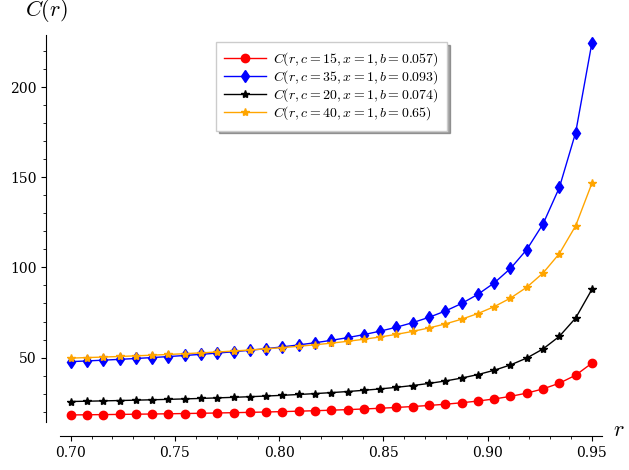

In [85]:
myplot.show(legend_handlelength=3,legend_numpoints=1,legend_loc=9,legend_markerscale=1)

### Weight function

In [86]:
## Weight
## Redefine weight function 
print(weightfn())
print('Latex:')
print(latex(weightfn()))

w*x*e^(1/4*r)
Latex:
w x e^{\left(\frac{1}{4} \, r\right)}


In [87]:
N(weightfn(w=8,x=5,r=1),digits=5)

51.361

In [88]:
# weightplot = plot(weightfn(w=8,x=1),(r,0.5,1),plot_points=2,
#             marker='*',markersize=6,color='red',legend_label=r'$W(r,w=8,x=1)$')
weightplot=plot(weightfn(w=8,r=0.82),(x,1,5),color='red',legend_label=r'$W(x,w=8,r=0.82)$',
                marker='*',markersize=6,plot_points=20,)
weightplot+=plot(weightfn(w=15,r=0.95),(x,1,5),color='blue',legend_label=r'$W(x,w=15,r=0.95)$',
                marker='d',markersize=6,plot_points=20,)
weightplot+=plot(weightfn(w=20,r=0.89),(x,1,5),color='black',legend_label=r'$W(x,w=20,r=0.89)$',
                marker='^',markersize=6,plot_points=20,)
weightplot+=plot(weightfn(w=35,r=0.85),(x,1,5),color='orange',legend_label=r'$W(x,w=35,r=0.85)$',
                marker='o',markersize=6,plot_points=30,)
weightplot.axes_labels(['$x$ ', '$W(x)$'])

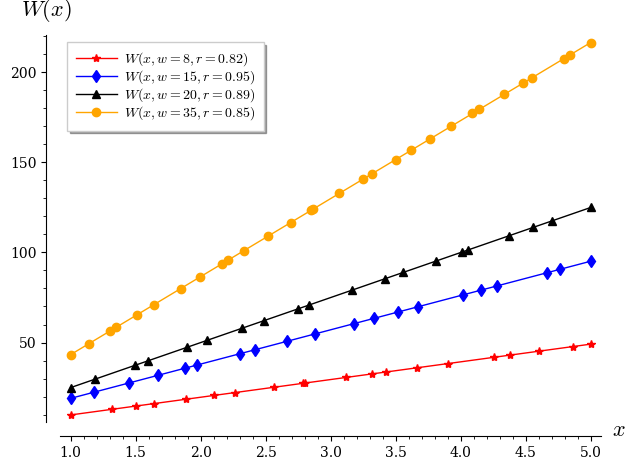

In [89]:
weightplot.show(legend_handlelength=3,legend_numpoints=1,legend_loc='best',legend_markerscale=1)
# weightplot.show(legend_handlelength=3,legend_numpoints=1,legend_markerscale=1)

### Volume function

In [90]:
## Volume
print(volumefn())
print('Latex:')
print(latex(volumefn()))

r^alpha*v*x
Latex:
r^{\alpha} v x


In [91]:
## volume
volume=[N(volumefn(v=8,alpha=0.3,x=10,r=0.85),digits=3), 
N(volumefn(v=5,alpha=0.5,x=10,r=0.75),digits=3),
N(volumefn(v=10,alpha=0.2,x=10,r=0.95),digits=3),
N(volumefn(v=6,alpha=0.7,x=10,r=0.83),digits=3)]
volume,sum(volume)

([76.2, 43.3, 99.0, 52.7], 271.)

In [92]:
c=[15,35,20,40]
b=[0.057,0.093,0.074,0.065]
r=[0.82,0.89,0.85,0.95]
a=[0.3,0.5,0.8,0.2]
w=[8,20,35,15]
v=[15,8,6,10]

row=[]
row.append(['c','b','r','w','v',r'$\alpha$'])
for j in range(4):
    val=[c[j],N(b[j],7),N(r[j],digits=2),w[j],v[j],N(a[j],5)]
    row.append(val)
print('Structure of the Reliability:')
table(row) 

Structure of the Reliability:


c,b,r,w,v,\(\alpha\)
\(15\),\(0.057\),\(0.82\),\(8\),\(15\),\(0.30\)
\(35\),\(0.093\),\(0.89\),\(20\),\(8\),\(0.50\)
\(20\),\(0.074\),\(0.85\),\(35\),\(6\),\(0.81\)
\(40\),\(0.065\),\(0.95\),\(15\),\(10\),\(0.20\)


In [93]:
#latex(table(row))

In [94]:
c=[15,35,20,40]
b=[0.057,0.093,0.074,0.065]
r=[0.82,0.89,0.85,0.95]
a=[0.3,0.5,0.8,0.2]
w=[8,20,35,15]
v=[15,8,6,10]
X=[];

for j in range(4):
    X.append(round(10*random())+1)

row =[]
system_cost=0;
system_weight=0;
system_volume=0;
system_reliability=1;
row.append(['c','b','r','w','v','alpha','X','stage-cost','stage-weight','stage-volume','stage-rel'])
for j in range(4):
    Cost = costfn(c=c[j],b=b[j],r=r[j],x=X[j])
    Weight=weightfn(w=w[j],r=r[j],x=X[j])
    Volume=volumefn(v=v[j],x=X[j],alpha=a[j],r=r[j])
    stagerel=(1-(1-r[j])**X[j])
    system_cost+=Cost
    system_weight+=Weight
    system_volume+=Volume
    system_reliability*=stagerel
    val=[c[j],N(b[j],3),N(r[j],digits=5),w[j],v[j],a[j],X[j],
         N(Cost,digits=5),N(Weight,digits=5),N(Volume,digits=5),N(stagerel,digits=5)]
#     val=[c[j],b[j],r[j],w[j],v[j],a[j],X[j],Cost,Weight,Volume,stagerel]
    row.append(val)
print('System Reliability: ',system_reliability)
print('System Cost: ',system_cost)
print('System Weight: ',system_weight)
print('System Volume: ',system_volume)
table(row)

System Reliability:  0.999799633293790
System Cost:  2272.54977971038
System Weight:  679.8833421580885
System Volume:  251.73504819670035


c,b,r,w,v,alpha,X,stage-cost,stage-weight,stage-volume,stage-rel
\(15\),\(0.055\),\(0.82000\),\(8\),\(15\),\(0.300000000000000\),\(5.0\),\(102.94\),\(49.101\),\(70.665\),\(0.99981\)
\(35\),\(0.094\),\(0.89000\),\(20\),\(8\),\(0.500000000000000\),\(8.0\),\(652.13\),\(199.87\),\(60.378\),\(1.0000\)
\(20\),\(0.078\),\(0.85000\),\(35\),\(6\),\(0.800000000000000\),\(6.0\),\(196.53\),\(259.72\),\(31.611\),\(0.99999\)
\(40\),\(0.062\),\(0.95000\),\(15\),\(10\),\(0.200000000000000\),\(9.0\),\(1320.9\),\(171.19\),\(89.081\),\(1.0000\)


## Optimization 

In [95]:
# Run for 300

In [96]:
# pip install -U pymoo

In [97]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.core.problem import ElementwiseProblem
# from pymoo.algorithms.nsga2 import NSGA2
# from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# previously it was Problem module. But due to version error we have used ElementwiseProblem
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=4,
                         n_obj=3,
                         n_constr=1,
                         xl=np.array([1,1,1,1]),
                         xu=np.array([8,8,8,8]),
                         elementwise_evaluation=True)
    

    def _evaluate(self, x, out, *args, **kwargs):
        c=np.array([15,35,20,40])
        b=np.array([0.057,0.093,0.074,0.065])
        r=np.array([0.82,0.89,0.85,0.95])
        a=np.array([0.3,0.5,0.81,0.2])
        w=np.array([8,20,35,15])
        v=np.array([15,8,6,10])
        Vol=500;
        f1=(1-(1-r[0])**x[0])*(1-(1-r[1])**x[1])*(1-(1-r[2])**x[2])*(1-(1-r[3])**x[3])
        f1=-1*f1
        
        f2=c[0]*x[0]*exp(b[0]/(1-r[0])) + c[1]*x[1]*exp(b[1]/(1-r[1])) + c[2]*x[2]*exp(b[2]/(1-r[2])) + c[3]*x[3]*exp(b[3]/(1-r[3]))
        
        f3= w[0]*x[0]*exp(r[0]/4) + w[1]*x[1]*exp(r[1]/4) + w[2]*x[2]*exp(r[2]/4) + w[3]*x[3]*exp(r[3]/4)
        
        g1=v[0]*x[0]*r[0]**a[0] + v[1]*x[1]*r[1]**a[1] + v[2]*x[2]*r[2]**a[2] + v[3]*x[3]*r[3]**a[3] - Vol
    
        out["F"] = [f1, f2, f3]
        out["G"] = [g1]
        #out["G"]=[]


# problem = MyProblem()

# algorithm = NSGA2(pop_size=300)

# res = minimize(problem,
#                algorithm,
#                ("n_gen", 300),
#                verbose=True,
#                seed=1)

# plot = Scatter()
# plot.add(res.F, color="red")
# plot.show()

In [98]:
problem = MyProblem()

algorithm = NSGA2(pop_size=200)
res = minimize(problem,
               algorithm,
               ('n_gen', 50), save_history=True,
               verbose=False)
# res = minimize(problem,
#                algorithm,
#                ("n_gen", 300),
#                verbose=True,
#                seed=1)

# plot = Scatter()
# plot.add(res.F, color="red")
# plot.show()

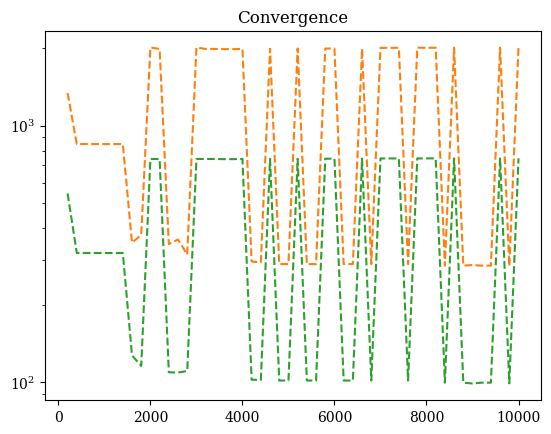

In [99]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

plt.title("Convergence")
plt.plot(n_evals, opt, "--")
plt.yscale("log")
plt.show()

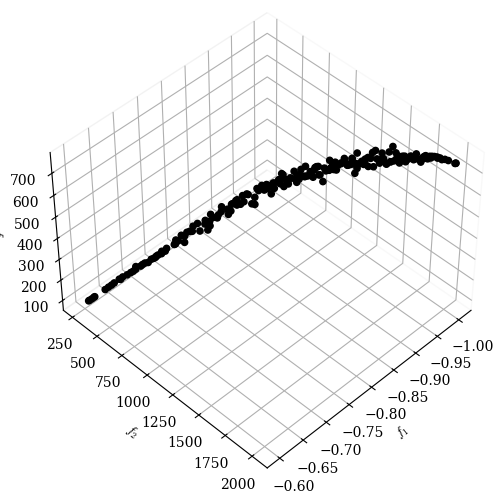

In [100]:
plot1 = Scatter()
plot1.add(res.F,color="black")
plot1.show()

In [101]:
# Save results manually as CSV
def save_csv(filename, data):
    with open(filename, "w") as f:
        f.write("f1,f2,f3\n")
        for row in data:
            f.write("{},{},{}\n".format(row[0], row[1], row[2]))

save_csv("NSGA2_Soln.csv", res.F)

## Interval Hesitant environment

In [102]:
# interval for reliability
r1I=[0.78,0.85];
r2I=[0.86,0.95];
r3I=[0.80,0.90];
r4I=[0.87,0.97];
p=[random(),random(),random(),random()]
r1=(r1I[0]^(1-p[0]))*(r1I[1]^p[0]);
r2=(r2I[0]^(1-p[1]))*(r2I[1]^p[1]);
r3=(r3I[0]^(1-p[2]))*(r3I[1]^p[2]);
r4=(r4I[0]^(1-p[3]))*(r4I[1]^p[3]);
r=[r1,r2,r3,r4]

# Hesitant alternative
c=[15,35,20,40]
b=[0.057,0.093,0.074,0.065]
a=[0.3,0.5,0.8,0.2]
w=[8,20,35,15]
v=[15,8,6,10]

rowin=[]
rowin.append(['p','c','b','r','w','v',r'$\alpha$'])
for j in range(4):
    val=[N(p[j],3),c[j],N(b[j],7),N(r[j],digits=2),w[j],v[j],N(a[j],5)]
    rowin.append(val)
print('Structure of the Reliability:')
table(rowin) 

Structure of the Reliability:


p,c,b,r,w,v,\(\alpha\)
\(0.12\),\(15\),\(0.057\),\(0.79\),\(8\),\(15\),\(0.30\)
\(0.88\),\(35\),\(0.093\),\(0.94\),\(20\),\(8\),\(0.50\)
\(0.31\),\(20\),\(0.074\),\(0.83\),\(35\),\(6\),\(0.81\)
\(0.62\),\(40\),\(0.065\),\(0.93\),\(15\),\(10\),\(0.20\)


## Hesitant Aggregation
#### Hesitant fuzzy weighted average

In [103]:
# Alternatives for stage 1
c,w,v=15,8,15;
# Alternative 1
h1=[0.8,0.6,0.5];
h2=[0.3,0.4];
h3=[0.5,0.3,0.4];
w=[0.3,0.2,0.5];


HFWA1=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA1.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA1)
print('scores')
print(mean(HFWA1))

hesitant fuzzy weighted average for alternatives
[0.593731071339564, 0.519296120930090, 0.554954686718444, 0.606065287907328, 0.533890162785476, 0.568466144005081, 0.499824278164079, 0.408184104809850, 0.452084948868074, 0.515009479984469, 0.426151477908230, 0.468719504022666, 0.465194812137465, 0.367209968037934, 0.414150269473804, 0.481431355331676, 0.386421305025672, 0.431936511400556]
scores
0.482928971602803


/tmp/ipykernel_1895/3876838213.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA1))


In [104]:
# Alternatives for stage 1
# Alternative 2
c,w,v=15,10,12;
h1=[0.2,0.4];
h2=[0.8,0.6];
h3=[0.6,0.3];
w=[0.3,0.2,0.5];


HFWA2=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA2.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA2)
print('scores')
print(mean(HFWA2))

hesitant fuzzy weighted average for alternatives
[0.571290614985483, 0.432870791266073, 0.507542234662034, 0.348539610856568, 0.606738555672513, 0.479764009039699, 0.548261225817258, 0.402405772973649]
scores
0.487176601909160


/tmp/ipykernel_1895/1746668059.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA2))


In [105]:
# Alternatives for stage 1
# Alternative 3
c,w,v=20,8,10;
h1=[0.4,0.6,0.5];
h2=[0.1,0.4,];
h3=[0.9,0.6];
w=[0.3,0.2,0.5];


HFWA3=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA3.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA3)
print('scores')
print(mean(HFWA3))

hesitant fuzzy weighted average for alternatives
[0.734359752011333, 0.468719504022666, 0.755051025721682, 0.510102051443364, 0.764784195495065, 0.529568390990131, 0.783105645760460, 0.566211291520921, 0.748499123358561, 0.496998246717121, 0.768089051904339, 0.536178103808677]
scores
0.638472198562860


/tmp/ipykernel_1895/529847058.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA3))


In [106]:
# Alternatives for stage 2
# Alternative 1
c,w,v=35,20,8;
h1=[0.3,0.7];
h2=[0.8,0.4,0.6];
h3=[0.4,0.6,0.7];
w=[0.3,0.2,0.5];


HFWA1=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA1.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA1)
print('scores')
print(mean(HFWA1))

hesitant fuzzy weighted average for alternatives
[0.495558235292756, 0.588125023839387, 0.643305807461799, 0.371601286469935, 0.486914598943321, 0.555655008373989, 0.420548574688988, 0.526879892419861, 0.590265967794373, 0.608782745683303, 0.680572449450485, 0.723367626555482, 0.512648562186259, 0.602079217314869, 0.655390493500889, 0.550609383519954, 0.633074098143039, 0.682232847685356]
scores
0.573756212184669


/tmp/ipykernel_1895/3201611049.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA1))


In [107]:
# Alternatives for stage 2
# Alternative 2
c,w,v=35,20,8;
h1=[0.2,0.4,0.6];
h2=[0.3,0.6,0.6];
h3=[0.5,0.8];
w=[0.3,0.2,0.5];


HFWA2=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA2.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA2)
print('scores')
print(mean(HFWA2))

hesitant fuzzy weighted average for alternatives
[0.384211454370945, 0.610541127753933, 0.449415480328334, 0.651779774681550, 0.449415480328334, 0.651779774681550, 0.435128081354682, 0.642743630162292, 0.494940696427481, 0.680572449450485, 0.494940696427481, 0.680572449450485, 0.499824278164079, 0.683661097735935, 0.552786404500042, 0.717157287525381, 0.552786404500042, 0.717157287525381]
scores
0.574967436409356


/tmp/ipykernel_1895/3054569833.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA2))


In [108]:
# Alternatives for stage 2
# Alternative 3
c,w,v=35,20,8;
h1=[0.6,0.7,0.2];
h2=[0.5,0.3];
h3=[0.6,0.8,0.7];
w=[0.3,0.2,0.5];


HFWA3=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA3.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA3)
print('scores')
print(mean(HFWA3))

hesitant fuzzy weighted average for alternatives
[0.581744178963491, 0.704248472674337, 0.637779833701665, 0.552629234111942, 0.683661097735935, 0.612565551830441, 0.616327764148138, 0.728702760276144, 0.667730097025513, 0.589620195655213, 0.709817657485792, 0.644600664237327, 0.485066682581910, 0.635887159394784, 0.554054665860938, 0.449221980883081, 0.610541127753933, 0.523012243598677]
scores
0.610400631551070


/tmp/ipykernel_1895/993977839.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA3))


In [109]:
# Alternatives for stage 3
# Alternative 1
c,w,v=20,35,6;
h1=[0.2,0.7,0.6];
h2=[0.9,0.4,0.5];
h3=[0.3,0.3,0.5];
w=[0.3,0.2,0.5];


HFWA1=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA1.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA1)
print('scores')
print(mean(HFWA1))

hesitant fuzzy weighted average for alternatives
[0.506285347874995, 0.506285347874995, 0.582734961134742, 0.293509597920481, 0.293509597920481, 0.402906630757634, 0.318807250165125, 0.318807250165125, 0.424287049186838, 0.632137602974667, 0.632137602974667, 0.689099529999409, 0.473600283755483, 0.473600283755483, 0.555111040128063, 0.492449339487927, 0.492449339487927, 0.571041399777953, 0.598979090695279, 0.598979090695279, 0.661075472266017, 0.426151477908230, 0.426151477908230, 0.515009479984469, 0.446699556566129, 0.446699556566129, 0.532375776088689]
scores
0.492995571630387


/tmp/ipykernel_1895/1288736549.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA1))


In [110]:
# Alternatives for stage 3
# Alternative 2
c,w,v=20,35,6;
h1=[0.4,0.5];
h2=[0.8,0.7];
h3=[0.2,0.3,0.7];
w=[0.3,0.2,0.5];


HFWA2=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA2.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA2)
print('scores')
print(mean(HFWA2))

hesitant fuzzy weighted average for alternatives
[0.443844331873636, 0.479764009039699, 0.659425598883437, 0.396864877525363, 0.435818753442492, 0.630656675996525, 0.473447118266305, 0.507454880133504, 0.677553529290097, 0.428968263717007, 0.465848721463598, 0.650315904792785]
scores
0.520830222035371


/tmp/ipykernel_1895/1668738036.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA2))


In [111]:
# Alternatives for stage 3
# Alternative 3
c,w,v=20,35,6;
h1=[0.2,0.2,0.4];
h2=[0.2,0.3,0.2];
h3=[0.3,0.9,0.8];
w=[0.3,0.2,0.5];


HFWA3=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA3.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA3)
print('scores')
print(mean(HFWA3))

hesitant fuzzy weighted average for alternatives
[0.251668522645212, 0.717157287525381, 0.600000000000000, 0.271389166907927, 0.724610990441541, 0.610541127753933, 0.251668522645212, 0.717157287525381, 0.600000000000000, 0.251668522645212, 0.717157287525381, 0.600000000000000, 0.271389166907927, 0.724610990441541, 0.610541127753933, 0.251668522645212, 0.717157287525381, 0.600000000000000, 0.313544494459106, 0.740544206603954, 0.633074098143039, 0.331634532412349, 0.747381598265668, 0.642743630162292, 0.313544494459106, 0.740544206603954, 0.633074098143039]
scores
0.540165598894136


/tmp/ipykernel_1895/1871511888.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA3))


In [112]:
# Alternatives for stage 4
# Alternative 1
c,w,v=40,15,10;
h1=[0.3,0.2,0.2];
h2=[0.5,0.6,0.8];
h3=[0.6,0.6,0.9];
w=[0.3,0.2,0.5];


HFWA1=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA1.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA1)
print('scores')
print(mean(HFWA1))

hesitant fuzzy weighted average for alternatives
[0.505286902387968, 0.505286902387968, 0.752643451193984, 0.526879892419861, 0.526879892419861, 0.763439946209930, 0.588125023839387, 0.588125023839387, 0.794062511919693, 0.485066682581910, 0.485066682581910, 0.742533341290955, 0.507542234662034, 0.507542234662034, 0.753771117331017, 0.571290614985483, 0.571290614985483, 0.785645307492741, 0.485066682581910, 0.485066682581910, 0.742533341290955, 0.507542234662034, 0.507542234662034, 0.753771117331017, 0.571290614985483, 0.571290614985483, 0.785645307492741]
scores
0.606304711398710


/tmp/ipykernel_1895/2938490025.py:19: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA1))


In [113]:
# Alternatives for stage 4
# Alternative 2
c,w,v=45,12,10;
h1=[0.2,0.2,0.2];
h2=[0.5,0.6,0.8];
h3=[0.6,0.6,0.9];
w=[0.3,0.2,0.5];

HFWA2=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA2.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA2)
print('scores')
print(mean(HFWA2))

hesitant fuzzy weighted average for alternatives
[0.485066682581910, 0.485066682581910, 0.742533341290955, 0.507542234662034, 0.507542234662034, 0.753771117331017, 0.571290614985483, 0.571290614985483, 0.785645307492741, 0.485066682581910, 0.485066682581910, 0.742533341290955, 0.507542234662034, 0.507542234662034, 0.753771117331017, 0.571290614985483, 0.571290614985483, 0.785645307492741, 0.485066682581910, 0.485066682581910, 0.742533341290955, 0.507542234662034, 0.507542234662034, 0.753771117331017, 0.571290614985483, 0.571290614985483, 0.785645307492741]
scores
0.601083203397063


/tmp/ipykernel_1895/2183608380.py:18: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA2))


In [114]:
# Alternatives for stage 4
# Alternative 3
c,w,v=40,15,12;
h1=[0.4,0.5,0.4];
h2=[0.5,0.6,0.8];
h3=[0.6,0.6,0.7];
w=[0.3,0.2,0.5];

HFWA3=[];
for score1 in h1:
    for score2 in h2:
        for score3 in h3:
            avr=1- ((1-score1)^w[0])*((1-score2)^w[1])*((1-score3)^w[2])
            HFWA3.append(avr)
print('hesitant fuzzy weighted average for alternatives')
print(HFWA3)
print('scores')
print(mean(HFWA3))

hesitant fuzzy weighted average for alternatives
[0.527644070275427, 0.527644070275427, 0.590927765230303, 0.548261225817258, 0.548261225817258, 0.608782745683303, 0.606738555672513, 0.606738555672513, 0.659425598883437, 0.552786404500042, 0.552786404500042, 0.612701665379258, 0.572306160003525, 0.572306160003525, 0.629606269520935, 0.627670886672786, 0.627670886672786, 0.677553529290097, 0.527644070275427, 0.527644070275427, 0.590927765230303, 0.548261225817258, 0.548261225817258, 0.608782745683303, 0.606738555672513, 0.606738555672513, 0.659425598883437]
scores
0.587934666414736


/tmp/ipykernel_1895/3602320821.py:18: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(mean(HFWA3))


In [115]:
# Alternatives for stage 4
# Alternative 3
c,w,v=40,15,12;
h1=[0.4,0.5,0.4];
h2=[0.5,0.6,0.8];
h3=[0.6,0.6,0.7];
# w=[1-x-y,y,x];
var('x,y')
def HFWA(x,y):
    HFWA=[];
    for score1 in h1:
        for score2 in h2:
            for score3 in h3:
                avr=1- ((1-score1)^(1-x-y))*((1-score2)^y)*((1-score3)^x)
                HFWA.append(avr)
    return mean(HFWA)
# x, y = var('x y')
cm = colormaps.hsv
#def c(x,y): return float(10*x+y+5*x*y) 
def c(x,y): return HFWA(10*x,5*y)
plot3d(HFWA(x,y),(x,0,0.5),(y,0,0.5),color=(c,cm))
# HFWA(0.5,0.2)

/tmp/ipykernel_1895/886568056.py:16: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  return mean(HFWA)


Graphics3d Object

### Optimization Interval and Hesitant fuzzy aggregation 

In [116]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.core.problem import ElementwiseProblem
# from pymoo.algorithms.nsga2 import NSGA2
# from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=8,
                         n_obj=3,
                         n_constr=1,
                         xl=np.array([0,0,0,0,1,1,1,1]),
                         xu=np.array([1,1,1,1,9,9,9,9]),
                         elementwise_evaluation=True)
    

    def _evaluate(self,x, out, *args, **kwargs):
        r1I=np.array([0.78,0.85]);
        r2I=np.array([0.86,0.95]);
        r3I=np.array([0.80,0.90]);
        r4I=np.array([0.87,0.97]);
        
        r1=(r1I[0]^(1-x[0]))*(r1I[1]^x[0]);
        r2=(r2I[0]^(1-x[1]))*(r2I[1]^x[1]);
        r3=(r3I[0]^(1-x[2]))*(r3I[1]^x[2]);
        r4=(r4I[0]^(1-x[3]))*(r4I[1]^x[3]);
        
        # Alternatives are chosen here
        c=np.array([20,40,25,40]);
        b=np.array([0.057,0.093,0.074,0.065]);
        r=np.array([r1,r2,r3,r4]);
        a=np.array([0.3,0.5,0.8,0.2]);
        w=np.array([8,15,30,15]);
        v=np.array([10,8,10,10]);
        V=500;
        f1=(1-(1-r[0])**x[4])*(1-(1-r[1])**x[5])*(1-(1-r[2])**x[6])*(1-(1-r[3])**x[7])
        f1=-1*f1
        
        f2=c[0]*x[4]*exp(b[0]/(1-r[0])) + c[1]*x[5]*exp(b[1]/(1-r[1])) + c[2]*x[6]*exp(b[2]/(1-r[2])) + c[3]*x[7]*exp(b[3]/(1-r[3]))
        
        f3= w[0]*x[4]*exp(r[0]/4) + w[1]*x[5]*exp(r[1]/4) + w[2]*x[6]*exp(r[2]/4) + w[3]*x[7]*exp(r[3]/4)
        
        g1=v[0]*x[4]*r[0]**a[0] + v[1]*x[5]*r[1]**a[1] + v[2]*x[6]*r[2]**a[2] + v[3]*x[7]*r[3]**a[3] - V
    
        out["F"] = [f1, f2, f3]
        out["G"] = [g1]
        #out["G"]=[]


# problem = MyProblem()

# algorithm = NSGA2(pop_size=300)

# res = minimize(problem,
#                algorithm,
#                ("n_gen", 300),
#                verbose=True,
#                seed=1)

# plot = Scatter()
# plot.add(res.F, color="red")
# plot.show()

In [117]:
problem = MyProblem()

algorithm = NSGA2(pop_size=300)
res = minimize(problem,
               algorithm,
               ('n_gen', 300), save_history=True,
               verbose=False)

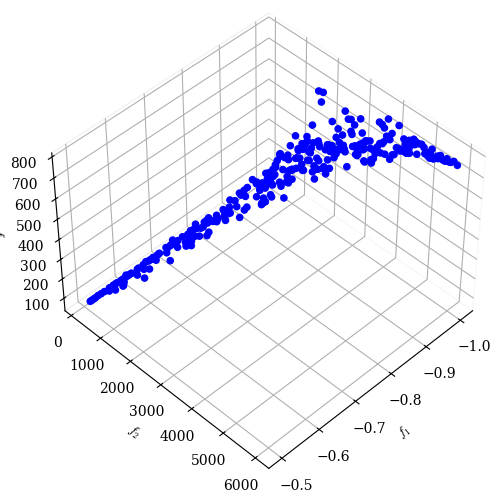

In [118]:
plot2 = Scatter()
plot2.add(res.F,color="blue")
plot2.show()

In [119]:
result3=[];
count=0
result3.append(['Index',r'$\lambda_1$',r'$\lambda_2$',r'$\lambda_3$',r'$\lambda_4$',r'$x_1$',r'$x_2$',r'$x_3$',r'$x_4$', r'$R$',r'$C$',r'$W$',r'$V$']);
for j in range(len(res.X)):
    if(-1*res.F[j][0]>0.95):
        if(res.F[j][1]<1000):
            p1,p2,p3,p4,x1,x2,x3,x4=res.X[j][0],res.X[j][1],res.X[j][2],res.X[j][3],res.X[j][4],res.X[j][5],res.X[j][6],res.X[j][7]
            x1,x2,x3,x4=round(x1,0),round(x2,0),round(x3,0),round(x4,0)
            p1,p2,p3,p4=N(p1,3),N(p2,3),N(p3,3),N(p4,3);
            R=N(-1*res.F[j][0],digits=5)
            C=N(res.F[j][1],digits=5)
            W=N(res.F[j][2],digits=5)
            V=N(500+res.G[j][0],digits=5)
            result3.append([j,p1,p2,p3,p4,x1,x2,x3,x4,R,C,W,V])
            count+=1;
table(result3)

Index,\(\lambda_1\),\(\lambda_2\),\(\lambda_3\),\(\lambda_4\),\(x_1\),\(x_2\),\(x_3\),\(x_4\),\(R\),\(C\),\(W\),\(V\)
\(23\),\(1.0\),\(0.012\),\(1.0\),\(0.023\),\(4.0\),\(3.0\),\(2.0\),\(3.0\),\(0.98759\),\(634.97\),\(234.15\),\(106.94\)
\(46\),\(1.0\),\(0.88\),\(1.0\),\(0.88\),\(4.0\),\(2.0\),\(2.0\),\(1.0\),\(0.95791\),\(766.39\),\(170.97\),\(80.969\)
\(77\),\(1.0\),\(0.012\),\(1.0\),\(0.023\),\(4.0\),\(3.0\),\(3.0\),\(3.0\),\(0.99076\),\(681.36\),\(267.24\),\(115.86\)
\(87\),\(1.0\),\(0.22\),\(1.0\),\(0.44\),\(3.0\),\(2.0\),\(2.0\),\(3.0\),\(0.97428\),\(644.93\),\(206.28\),\(97.873\)
\(97\),\(1.0\),\(0.88\),\(1.0\),\(0.44\),\(3.0\),\(1.0\),\(2.0\),\(3.0\),\(0.97131\),\(741.53\),\(193.22\),\(92.536\)
\(105\),\(1.0\),\(0.12\),\(1.0\),\(0.75\),\(5.0\),\(3.0\),\(3.0\),\(3.0\),\(0.99519\),\(896.33\),\(280.01\),\(128.65\)
\(136\),\(1.0\),\(0.88\),\(1.0\),\(0.11\),\(3.0\),\(2.0\),\(2.0\),\(3.0\),\(0.96855\),\(672.29\),\(188.33\),\(90.720\)
\(138\),\(1.0\),\(0.75\),\(1.0\),\(1.0\),\(3.0\),\(2.0\),\(2.0\),\(1.0\),\(0.96000\),\(797.75\),\(159.50\),\(70.827\)
\(143\),\(1.0\),\(0.88\),\(1.0\),\(0.88\),\(4.0\),\(2.0\),\(2.0\),\(1.0\),\(0.95419\),\(753.04\),\(169.26\),\(79.753\)
\(161\),\(1.0\),\(0.50\),\(1.0\),\(0.22\),\(4.0\),\(3.0\),\(3.0\),\(2.0\),\(0.99338\),\(814.61\),\(261.25\),\(117.76\)


In [120]:
latex(table(result3))

\begin{tabular}{lllllllllllll}
Index & $\lambda_1$ & $\lambda_2$ & $\lambda_3$ & $\lambda_4$ & $x_1$ & $x_2$ & $x_3$ & $x_4$ & $R$ & $C$ & $W$ & $V$ \\
$23$ & $1.0$ & $0.012$ & $1.0$ & $0.023$ & $4.0$ & $3.0$ & $2.0$ & $3.0$ & $0.98759$ & $634.97$ & $234.15$ & $106.94$ \\
$46$ & $1.0$ & $0.88$ & $1.0$ & $0.88$ & $4.0$ & $2.0$ & $2.0$ & $1.0$ & $0.95791$ & $766.39$ & $170.97$ & $80.969$ \\
$77$ & $1.0$ & $0.012$ & $1.0$ & $0.023$ & $4.0$ & $3.0$ & $3.0$ & $3.0$ & $0.99076$ & $681.36$ & $267.24$ & $115.86$ \\
$87$ & $1.0$ & $0.22$ & $1.0$ & $0.44$ & $3.0$ & $2.0$ & $2.0$ & $3.0$ & $0.97428$ & $644.93$ & $206.28$ & $97.873$ \\
$97$ & $1.0$ & $0.88$ & $1.0$ & $0.44$ & $3.0$ & $1.0$ & $2.0$ & $3.0$ & $0.97131$ & $741.53$ & $193.22$ & $92.536$ \\
$105$ & $1.0$ & $0.12$ & $1.0$ & $0.75$ & $5.0$ & $3.0$ & $3.0$ & $3.0$ & $0.99519$ & $896.33$ & $280.01$ & $128.65$ \\
$136$ & $1.0$ & $0.88$ & $1.0$ & $0.11$ & $3.0$ & $2.0$ & $2.0$ & $3.0$ & $0.96855$ & $672.29$ & $188.33$ & $90.720$ \\
$138$ & $

In [121]:
# end